## 과적합 피하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

seed = 3
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("../dataset/sonar.csv", header = None)

print(df.shape)
df.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
dataset = df.values
X = dataset[:, 0:60]
X = np.asarray(X).astype(np.float32) # object 타입, float로 변경

Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

model = Sequential()
model.add(Dense(24, input_dim = X.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X, Y, epochs = 200, batch_size = 5)

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.5192
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6298
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6538
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.6971
Epoch 5/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.7212
Epoch 6/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.7019
Epoch 7/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.7163
Epoch 8/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7404
Epoch 9/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7692
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7644
Epoch 11/

Epoch 83/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9615
Epoch 84/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.9615
Epoch 85/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9615
Epoch 86/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9663
Epoch 87/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9567
Epoch 88/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1510 - accuracy: 0.9423
Epoch 89/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9615
Epoch 90/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.9712
Epoch 91/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9663
Epoch 92/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9712


42/42 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 165/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 170/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 171/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 172/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 173/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoc

In [6]:
score = model.evaluate(X, Y)
score

7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000


[0.003353102831169963, 1.0]

In [9]:
print("Accuracy : %.4f" % (model.evaluate(X, Y)[1]))
print("과적합(overfitting)")
print()
print("loss : %.4f" % (model.evaluate(X, Y)[0]))

7/7 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Accuracy : 1.0000
과적합(overfitting)

7/7 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
loss : 0.0034


- **과적합** : 모델이 학습 데이터 셋에서는 어느 정도 예측 정확도를 보이지만, 새로운 데이터에 적용시 잘 맞지 않는 것<br><br>

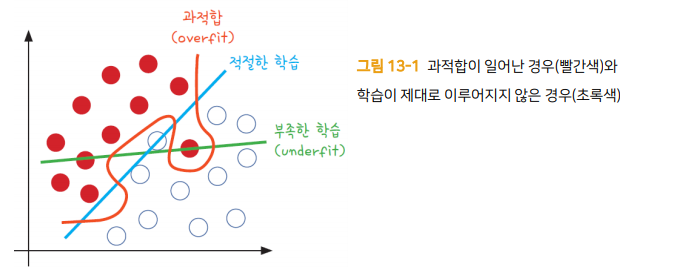

- 과적합은 층이 너무 많을 때, 변수가 복잡할때, 테스트 셋과 학습셋이 중복될 때 생기기도 함<br><br>


- 과적합을 방지하려면 학습 데이터셋과 테스트 데이터셋을 구분한 다음 학습과 동시에 테스트 병행하며 진행<br><br>

- 70%의 샘플은 학습셋으로 진행 후 이 학습의 결과를 파일에 저장<br><br>

- 30%의 샘플은 테스트 샘플로 실험하여 정확도 살펴보면 학습 잘 되었는지 파악 가능<br><br>

- 머신러닝의 최종 목적은 과거의 데이터를 토대로 새로운 데이터 예측<br><br>

- 테스트셋 만들어 정확한 평가를 병행하는 것이 매우 중요<br><br>

- 학습셋만 가지고 평가할때, 층을 더하거나 에포크 값을 높이면 정확도가 계속해서 올라갈 수 있음<br><br>

- 학습이 깊어져서 학습셋의 정확도는 높아져도 테스트셋에서 효과가 없다면 과적합 발생으로 판단<br><br>

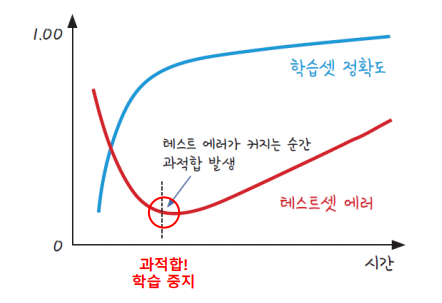

- 학습을 진행해도 테스트 결과가 더 이상 좋아지지 않는 점에서 학습을 멈춰야 함<br><br>

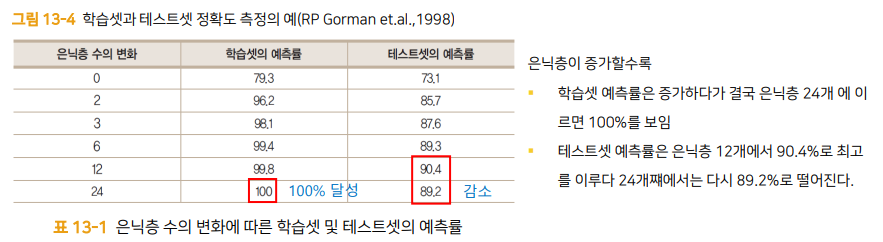

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("../dataset/sonar.csv", header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)

Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = seed)

model = Sequential()
model.add(Dense(24, input_dim=X.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 100, batch_size = 5)



Epoch 1/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5310
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.6414
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6828
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.7793
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7034
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.7448
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7724
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7103
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7793
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7862
Epoch 11/

Epoch 83/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9586
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9517
Epoch 85/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1283 - accuracy: 0.9517
Epoch 86/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9655
Epoch 87/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.9655
Epoch 88/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9724
Epoch 89/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9655
Epoch 90/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9724
Epoch 91/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9793
Epoch 92/100
29/29 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9793


In [23]:
model.save('my_model.h5')

In [25]:
# del model
# model = load('my_model.h5')

# 결과 출력
score = model.evaluate(X_test, Y_test)
print("\n Accuracy: %.4f" % (score[1]))
print("\n loss: %.4f" % (score[0]))

2/2 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.8254

 Accuracy: 0.8254

 loss: 0.5829


- 딥러닝 혹은 머신러닝 작업을 할 때 늘 어려운 문제중 하나는 알고리즘을 충분히 테스트 하였어도 데이터가 충분하지 않으면 좋은 결과 내기 어려움<br><br>

- **k겹 교차 검증(k-fold cross validation)** : 위의 단점 보완<br><br>
 1. 데이터 셋을 여러개로 나누어 하나씩 테스트 셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법<br><br>
 
- 이러면 데이터의 100%를 테스트셋으로 사용할 수있음<br><br>

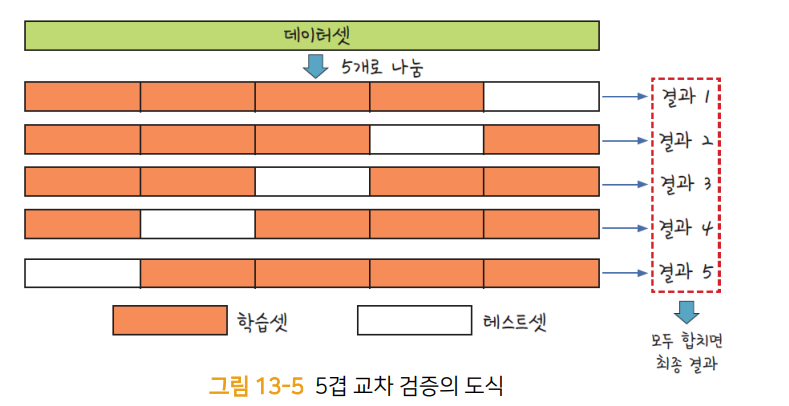

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("../dataset/sonar.csv", header = None)

dataset = df.values
X = dataset[:, 0:60].astype(float)

Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

# 빈 accuracy 배열
accuracy = []

# 모델 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim = X.shape[1], activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'mean_squared_error',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    model.fit(X[train], Y[train], epochs = 100, batch_size = 5)
    
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)
    

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.5455
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.6578
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.7326
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.7487
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1946 - accuracy: 0.7219
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1843 - accuracy: 0.7540
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1730 - accuracy: 0.7861
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.8075
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.8075
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.8075
Epoch 11/

Epoch 83/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9840
Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9840
Epoch 85/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9840
Epoch 86/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9840
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9840
Epoch 88/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9786
Epoch 89/100
38/38 [==============================] - 0s 997us/step - loss: 0.0222 - accuracy: 0.9840
Epoch 90/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9840
Epoch 91/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9893
Epoch 92/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.984

38/38 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9144
Epoch 65/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9358
Epoch 66/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9144
Epoch 67/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9305
Epoch 68/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9465
Epoch 69/100
38/38 [==============================] - 0s 987us/step - loss: 0.0646 - accuracy: 0.9412
Epoch 70/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9037
Epoch 71/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9412
Epoch 72/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9465
Epoch 73/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9412
Epoch 74/10

38/38 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9198
Epoch 46/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.8984
Epoch 47/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9037
Epoch 48/100
38/38 [==============================] - 0s 970us/step - loss: 0.0745 - accuracy: 0.9198
Epoch 49/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9251
Epoch 50/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9037
Epoch 51/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9305
Epoch 52/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9251
Epoch 53/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9091
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9251
Epoch 55/10

38/38 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.8503
Epoch 19/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.8556
Epoch 20/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.8396
Epoch 21/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.8503
Epoch 22/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.8556
Epoch 23/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.8824
Epoch 24/100
38/38 [==============================] - 0s 970us/step - loss: 0.1103 - accuracy: 0.8663
Epoch 25/100
38/38 [==============================] - 0s 970us/step - loss: 0.1105 - accuracy: 0.8717
Epoch 26/100
38/38 [==============================] - 0s 997us/step - loss: 0.1023 - accuracy: 0.8824
Epoch 27/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.8984
Epoch 2

38/38 [==============================] - 0s 997us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0620 - accuracy: 0.9048
Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.4385
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.5668
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.6631
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.7219
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.6952
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.7701
Epoch 7/100
38/38 [==============================] - 0s 997us/step - loss: 0.1868 - accuracy: 0.7594
Epoch 8/100
38/38 [==============================] - 0s 997us/step - loss: 0.1731 - accuracy: 0.8075
Epoch 9/100
38/

38/38 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 73/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 74/100
38/38 [==============================] - 0s 997us/step - loss: 0.0141 - accuracy: 1.0000
Epoch 75/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 76/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 1.0000
Epoch 77/100
38/38 [==============================] - 0s 970us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0092 - accuracy: 1.0000
Epoch 79/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 80/100
38/38 [==============================] - 0s 997us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 81/100
38/38 [==============================] - 0s 997us/step - loss: 0.0080 - accuracy: 1.0000
Epoch

38/38 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9358
Epoch 52/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9358
Epoch 53/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9572
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9305
Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9465
Epoch 56/100
38/38 [==============================] - 0s 943us/step - loss: 0.0520 - accuracy: 0.9572
Epoch 57/100
38/38 [==============================] - 0s 890us/step - loss: 0.0497 - accuracy: 0.9412
Epoch 58/100
38/38 [==============================] - 0s 916us/step - loss: 0.0510 - accuracy: 0.9519
Epoch 59/100
38/38 [==============================] - 0s 916us/step - loss: 0.0506 - accuracy: 0.9465
Epoch 60/100
38/38 [==============================] - 0s 943us/step - loss: 0.0479 - accuracy: 0.9572
Epo

38/38 [==============================] - 0s 997us/step - loss: 0.0954 - accuracy: 0.8396
Epoch 32/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.8930
Epoch 33/100
38/38 [==============================] - 0s 970us/step - loss: 0.0860 - accuracy: 0.8824
Epoch 34/100
38/38 [==============================] - 0s 997us/step - loss: 0.0858 - accuracy: 0.8824
Epoch 35/100
38/38 [==============================] - 0s 973us/step - loss: 0.0964 - accuracy: 0.8556
Epoch 36/100
38/38 [==============================] - 0s 916us/step - loss: 0.0782 - accuracy: 0.9037
Epoch 37/100
38/38 [==============================] - 0s 997us/step - loss: 0.0838 - accuracy: 0.8770
Epoch 38/100
38/38 [==============================] - 0s 970us/step - loss: 0.0812 - accuracy: 0.9037
Epoch 39/100
38/38 [==============================] - 0s 997us/step - loss: 0.0766 - accuracy: 0.9198
Epoch 40/100
38/38 [==============================] - 0s 970us/step - loss: 0.0756 - accuracy: 0.

Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.8289
Epoch 12/100
38/38 [==============================] - 0s 984us/step - loss: 0.1417 - accuracy: 0.8182
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.8075
Epoch 14/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.8342
Epoch 15/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.8396
Epoch 16/100
38/38 [==============================] - 0s 997us/step - loss: 0.1228 - accuracy: 0.8556
Epoch 17/100
38/38 [==============================] - 0s 997us/step - loss: 0.1260 - accuracy: 0.8396
Epoch 18/100
38/38 [==============================] - 0s 997us/step - loss: 0.1190 - accuracy: 0.8449
Epoch 19/100
38/38 [==============================] - 0s 997us/step - loss: 0.1224 - accuracy: 0.8075
Epoch 20/100
38/38 [==============================] - 0s 997us/step - loss: 0.1172 - accur

38/38 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9733
Epoch 93/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9840
Epoch 94/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9786
Epoch 95/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9840
Epoch 96/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9840
Epoch 97/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9786
Epoch 98/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9840
Epoch 99/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9840
Epoch 100/100
1/1 [==============================] - 0s 132ms/step - loss: 0.1386 - accuracy: 0.7619
Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.4840
Epoch 2/100
3

38/38 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9362
Epoch 73/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9415
Epoch 74/100
38/38 [==============================] - 0s 997us/step - loss: 0.0563 - accuracy: 0.9521
Epoch 75/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9521
Epoch 76/100
38/38 [==============================] - 0s 979us/step - loss: 0.0539 - accuracy: 0.9521
Epoch 77/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9468
Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0505 - accuracy: 0.9574
Epoch 79/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9415
Epoch 80/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9681
Epoch 81/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9681
Epoch 82/

38/38 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9202
Epoch 53/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.8989
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9149
Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9096
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9202
Epoch 57/100
38/38 [==============================] - 0s 943us/step - loss: 0.0668 - accuracy: 0.9255
Epoch 58/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9468
Epoch 59/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9255
Epoch 60/100
38/38 [==============================] - 0s 970us/step - loss: 0.0655 - accuracy: 0.9255
Epoch 61/100
38/38 [==============================] - 0s 943us/step - loss: 0.0626 - accuracy: 0.9415
Epoch 6

In [30]:
#  결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)


 10 fold accuracy: ['0.7143', '0.8095', '0.7619', '0.9048', '0.8571', '0.7619', '0.8571', '0.7619', '0.9500', '0.8500']
